<a href="https://colab.research.google.com/github/rajkumarshedage/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name - Bike Sharing Demand Predictionn

Project Type - Regression

Contribution - Individual

GitHub Link

https://github.com/rajkumarshedage/Bike-Sharing-Demand-Prediction

### Problem Statement
#### Business Problem Overview

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort.

It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern.

The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

#### Business Objective

The business objective for bike sharing demand prediction is to accurately predict the demand for bike rentals in a given area, at a given time, in order to optimize the allocation of bikes and ensure an adequate supply for customers.

This can help improve operational efficiency, increase customer satisfaction, and drive revenue growth.

In [1]:
## Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression,f_regression
from sklearn.model_selection import train_test_split
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 3.3 MB/s eta 0:00:00


In [2]:
## Loading Dataset
data = pd.read_csv("/content/drive/MyDrive/Projects_DS/Bike-Sharing-Demand-Prediction/Bike_data.csv", encoding= 'unicode_escape')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
## viewing first 5 rows of our dataset

data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
## Checking for the shape of the data

data.shape

(8760, 14)

In [5]:
## Getting all columns from our dataset

data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## Attribute Information:
Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - If the day is a Functioning Day or not

In [6]:
## Checking the details about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
## Changing the object column into str column

data['Seasons'] = data['Seasons'].astype(str)
data['Holiday'] = data['Holiday'].astype(str)
data['Functioning Day'] = data['Functioning Day'].astype(str)

In [8]:
## Checking for unique values in our features

data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [9]:
## Ckechking for any null or missing values

data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
## Checking for Duplicate Values

len(data[data.duplicated()])

0

In [11]:
## Looking for the description of the dataset to get insights of the data

data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
## Creating copy of the current data and assigning to df

df = data.copy()

In [13]:
## Creating new column for "year","month","day","date_day" from "Date" column

df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month            ## Month Number
df['year'] = df['Date'].dt.year              ## Year
df['Weekday'] = df['Date'].dt.day_name()     ## Day of weak ex. sunday, monday
df['day'] = df['Date'].dt.day

## Droping Date

df.drop(['Date'],axis=1,inplace=True)

df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,Weekday,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,Thursday,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,Thursday,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,Thursday,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,Thursday,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,Thursday,12


In [14]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [15]:
df[df['Functioning Day'] == 'No']['Rented Bike Count'].value_counts()

0    295
Name: Rented Bike Count, dtype: int64

### Exploring Rented Bike Count feature - Univariate and Bivariate analysis

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

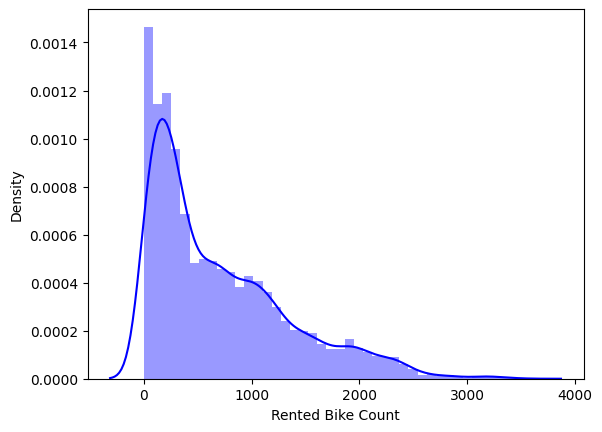

In [16]:
## Checking distribution

sns.distplot(df['Rented Bike Count'], color = 'blue' , label = 'All')

In [17]:
print('Mean of Rented Bike Count',df['Rented Bike Count'].mean())
print('Median of Rented Bike Count',df['Rented Bike Count'].median())

Mean of Rented Bike Count 704.6020547945205
Median of Rented Bike Count 504.5


### 1. Why did you pick the specific chart?
The distplot, or distribution plot, is a useful tool in Exploratory Data Analysis (EDA) for visualizing the distribution of a dataset. It combines a histogram, which shows the frequency of data points in different bins which shows the probability density function of the data.

To know the distribution of feature

### 2. What is/are the insight(s) found from the chart?
The mean rental count is 704.60, which is higher than the median rental count of 504.5. This indicates that the data may have some outliers with very high values that are affecting the mean.

The distribution of the bike rental count is skewed to the right, meaning that there are more values on the higher end of the scale than on the lower end.

### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights from the distribution plot of bike rental count can help create a positive business impact.

Understanding the mean and median rental counts, as well as the skewness of the data, can inform decisions about bike allocation and supply management.

By having a more accurate prediction of demand, the company can ensure an adequate supply of bikes to meet customer needs and avoid shortages or oversupply, which can lead to inefficiencies and waste.

By optimizing bike allocation and improving the overall customer experience, the company can drive customer satisfaction and potentially increase revenue.

month
1     287244
2     264112
3     455037
4     556219
5     665948
6     706728
7     691339
8     614190
9     499326
10    626988
11    493412
12    311771
Name: Rented Bike Count, dtype: int64



Text(0.5, 1.0, 'Monthly Rented Bike Count')

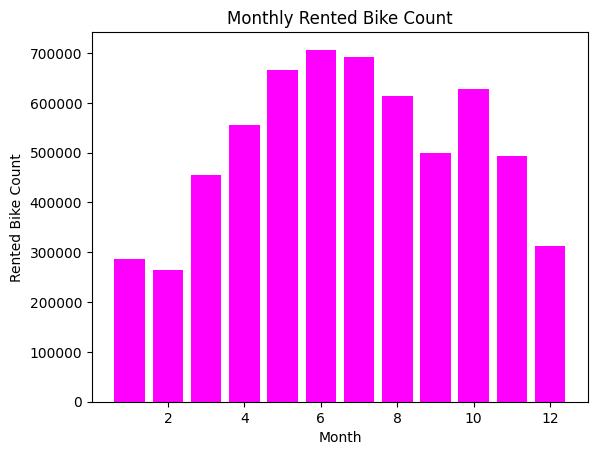

In [18]:
## Rented Bike Count per month

monthly_rentals = df.groupby("month")["Rented Bike Count"].sum()
print(monthly_rentals)
print()
## Plot the bar chart

plt.bar(monthly_rentals.index, monthly_rentals.values, color = "magenta")

## Add labels and title

plt.xlabel("Month")
plt.ylabel("Rented Bike Count")
plt.title("Monthly Rented Bike Count")

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
There is a clear seasonality in the bike rental demand. The highest demand is observed in the months from May to July and the lowest in December.

The overall trend is increasing but with some fluctuations. The bike rental demand increased from January to July, but then it decreased in the next few months.

The demand in March is significantly higher than other months. This could indicate a special event or promotion that happened in that month.

The low demand in December and September indicates a potential opportunity for bike rental companies to increase their revenue by improving their marketing strategies or offering promotions during these months.

### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can definitely help create a positive business impact. By understanding the seasonality and trend patterns in the bike rental demand, the company can adjust their strategies and operations accordingly to maximize their revenue and meet the demand of customers.

By focusing on the low demand months of December and September and improving their marketing and promotions, the company can increase their revenue and create a positive business impact.

Hour
0     197633
1     155557
2     110095
3      74216
4      48396
5      50765
6     104961
7     221192
8     370731
9     235784
10    192655
11    219311
12    255296
13    267635
14    276971
15    302653
16    339677
17    415556
18    548568
19    436229
20    390172
21    376479
22    336821
23    244961
Name: Rented Bike Count, dtype: int64



Text(0.5, 1.0, 'Hourly Rented Bike Count')

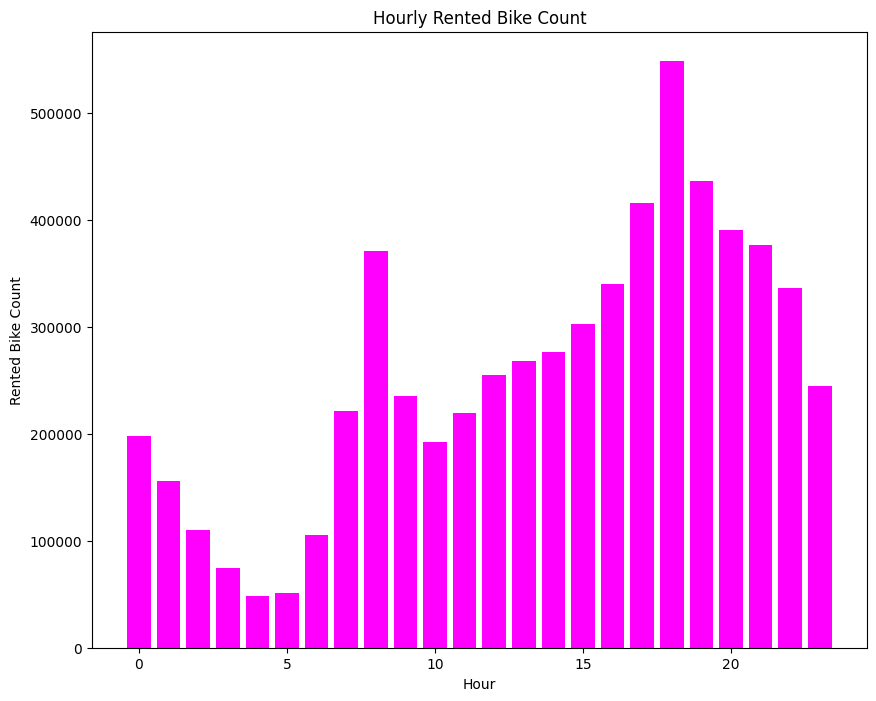

In [19]:
## Rented Bike Count per Hour

hourly_rentals = df.groupby("Hour")["Rented Bike Count"].sum()
print(hourly_rentals)
print()

## Plot the bar chart

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(hourly_rentals.index, hourly_rentals.values, color="magenta")

## Add labels and title

plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.title("Hourly Rented Bike Count")

### 1. Why did you pick the specific chart?
Easy to understand: Bar charts are simple and straightforward, making it easy for people to understand the data being presented.

Comparisons: Bar charts allow for easy comparison of data between different categories or groups.

To show the average percentage of true churn with respect to area code, I have used Bar Chart.

### 2. What is/are the insight(s) found from the chart?
High demand during peak hours: The highest demand for bike sharing is seen during the hours of 8 AM to 6 PM with an average of over 300,000 bikes rented during this time.

Low demand during off-peak hours: The demand for bike sharing is much lower during the early morning hours of midnight to 4 AM, with an average of less than 50,000 bikes rented.

Spike in demand during the morning rush hour: The demand for bike sharing spikes at 7 AM with over 220,000 bikes rented, which is likely due to people commuting to work.

Decrease in demand during the late night: The demand for bike sharing decreases after 6 PM, reaching its lowest point at midnight with less than 250,000 bikes rented.

### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can help create a positive business impact by allowing the bike sharing company to better understand the patterns of demand and allocate resources and bikes accordingly.

By having a high number of bikes available during peak hours and less during off-peak hours, the company can ensure that they meet the needs of their customers and reduce costs associated with maintaining and storing unused bikes.

## Exploring Functioning Day feature - Univariate and Bivariate analysis

following in the functioning day count

 Yes    8465
No      295
Name: Functioning Day, dtype: int64




Text(0.5, 1.0, 'Pie Chart For Driving_License')

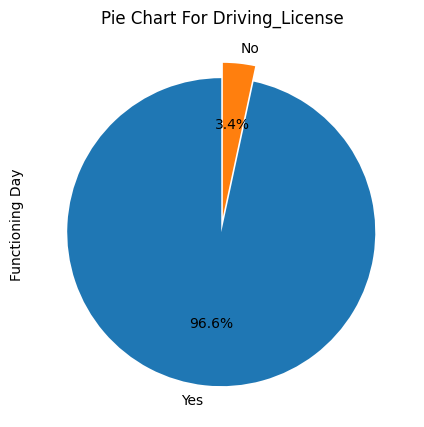

In [20]:
## Ploting value counts
print("following in the functioning day count\n\n", df['Functioning Day'].value_counts())
print()
print()

df['Functioning Day'].value_counts().plot.pie(explode = [0.05,0.05], autopct = '%1.1f%%',startangle=90, figsize = (5,5))
plt.title('Pie Chart For Driving_License')

### 1. Why did you pick the specific chart?
Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

### 2. What is/are the insight(s) found from the chart?
There is 8465 Functioning Day which is 96.6%

There is 295 Non Functioning Day which is 3.4%

Text(0, 0.5, 'Count of Rented Bikes')

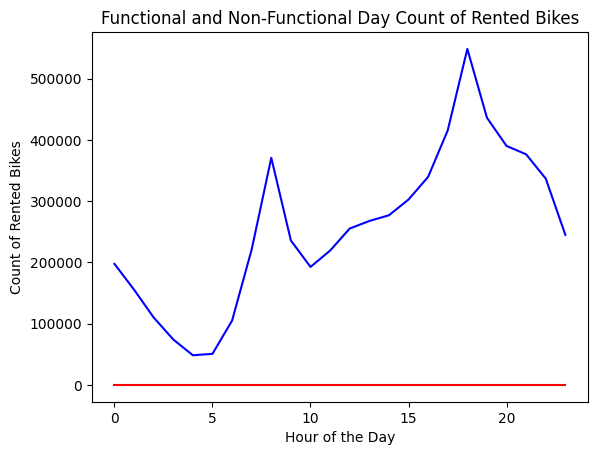

In [21]:
## Creating two separate dataframes for functional days and non-functional days

functional_days = df[df['Functioning Day'] == 'Yes']
non_functional_days = df[df['Functioning Day'] == 'No']

## Plot the count of rented bikes for functional days

functional_days.groupby('Hour')['Rented Bike Count'].sum().plot(kind='line', color='blue', label='Functional Days')

## Plot the count of rented bikes for non-functional days

non_functional_days.groupby('Hour')['Rented Bike Count'].sum().plot(kind='line', color='red', label='Non-Functional Days')

## Add the title and labels

plt.title('Functional and Non-Functional Day Count of Rented Bikes')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Rented Bikes')

In [22]:
## Total Rented Bike Count on functional day

functional_days['Rented Bike Count'].sum()

6172314

In [23]:
## Total Rented Bike Count on non functional day

non_functional_days['Rented Bike Count'].sum()

0

### 1. Why did you pick the specific chart?
A line plot is a useful tool for analyzing the trend and patterns in continuous data over time, which is why it may be a good choice for visualizing the bike sharing demand prediction data.

### 2. What is/are the insight(s) found from the chart?
there was a total of 6,172,314 bikes rented on functional days and no bikes rented on non-functional days.

## Exploring Functioning Day feature - Univariate and Bivariate analysis

Seasons wise count of bike rentals

 Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64




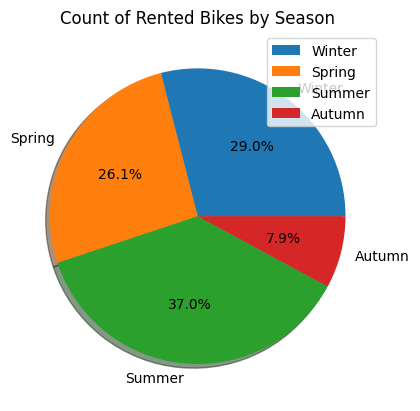

In [24]:
print("Seasons wise count of bike rentals\n\n", df.groupby('Seasons')['Rented Bike Count'].sum())
print()
print()

## Pie chart

plt.pie(df.groupby('Seasons')['Rented Bike Count'].sum(), labels = df['Seasons'].unique(), autopct='%1.1f%%', shadow = True)

## Title and Legend

plt.title('Count of Rented Bikes by Season')
plt.legend(df['Seasons'].unique())

### 1. Why did you pick the specific chart?
Pie charts can be used to show percentages of a whole, and represents percentages at a set point in time. Unlike bar graphs and line graphs, pie charts do not show changes over time.

### 2. What is/are the insight(s) found from the chart?
High demand in Summer: The highest demand for bike sharing is found in the summer season with a rented bike count of 2,283,234.

Low demand in Winter: The lowest demand for bike sharing is found in the winter season with a rented bike count of 487,169.

Significant difference in demand between Summer and Winter: The difference in demand between the summer and winter seasons is quite significant with the summer season having almost 5 times more demand than the winter season.

High demand in Autumn and Spring: The demand for bike sharing is also high in the autumn and spring seasons with rented bike counts of 1,790,002 and 1,611,909 respectively.

Bike sharing is a seasonal business: The data shows that bike sharing is a seasonal business with demand varying greatly between seasons. This means that bike sharing companies should adjust their operations and resource allocation accordingly.

### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights from the data will help create a positive business impact for bike sharing companies. By understanding the demand patterns and the difference in demand between seasons, they can adjust their operations and resource allocation to meet the needs of their customers.

This can result in increased customer satisfaction and higher profitability. For example, the company can increase the number of bikes available during the summer season to meet the high demand and reduce the number of bikes during the winter season to save on costs.

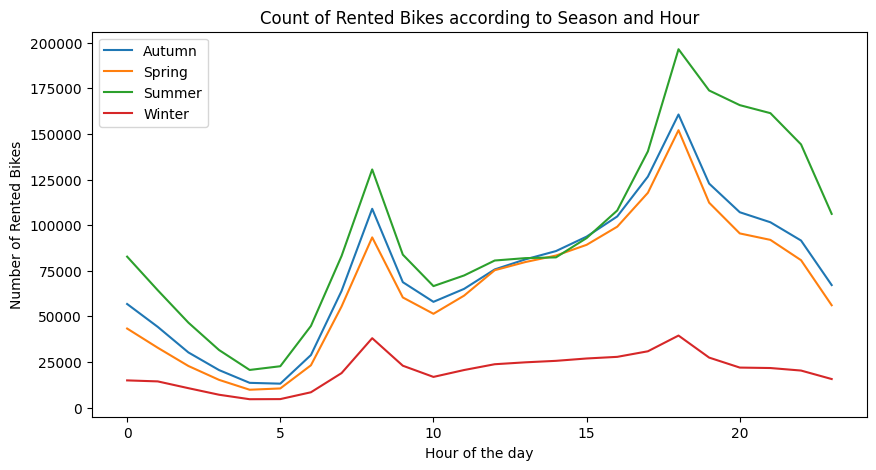

In [25]:
## Count of Rented Bikes according to Season and Hour

## group by season and hour to get count of rented bikes

grouped_df = df.groupby(['Seasons','Hour'])['Rented Bike Count'].sum().reset_index()

## plot the results

plt.figure(figsize=(10,5))

for i in grouped_df['Seasons'].unique():
    plt.plot(grouped_df[grouped_df['Seasons'] == i]['Hour'], grouped_df[grouped_df['Seasons'] == i]['Rented Bike Count'], label = i)

plt.xlabel('Hour of the day')
plt.ylabel('Number of Rented Bikes')
plt.title('Count of Rented Bikes according to Season and Hour')
plt.legend()
plt.show()

### 1. Why did you pick the specific chart?
A line plot is a useful tool for analyzing the trend and patterns in continuous data over time, which is why it may be a good choice for visualizing the bike sharing demand prediction data.

### 2. What is/are the insight(s) found from the chart?
In summer season the use of rented bike is high and peak time is early morning and evining.

In winter season the use of rented bike is very low.

### 3. Will the gained insights help creating a positive business impact?
Yes, the insights gained on the usage patterns of rented bikes in different seasons and peak times can help create a positive business impact.

For example, the company can plan to increase the number of bikes available during peak hours in the summer season to meet the demand and optimize the utilization of resources.

In the winter season, the company can plan to reduce the fleet size to minimize costs and prevent overstocking.

## Exploring Holiday feature - Univariate and Bivariate analysis

Text(0.5, 1.0, 'Pie Chart For Holiday')

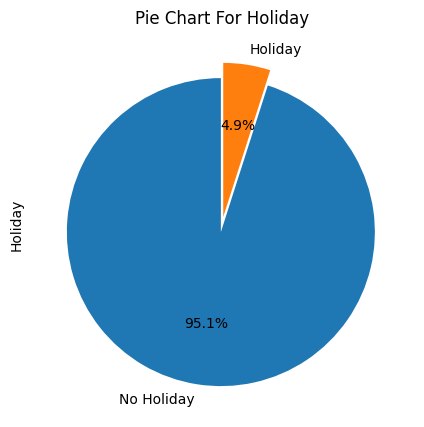

In [26]:
df['Holiday'].value_counts().plot.pie(explode = [0.05,0.05], autopct = '%1.1f%%',startangle = 90, figsize = (5,5))
plt.title('Pie Chart For Holiday')

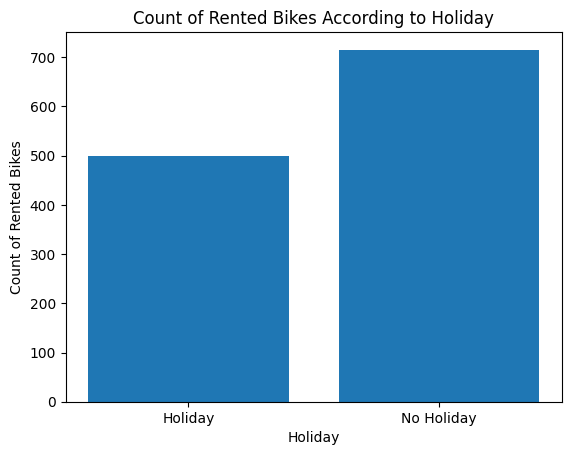

In [27]:
## Group the data by holiday and calculate the mean count of rented bikes

grouped_data_holiday = data.groupby("Holiday").mean()["Rented Bike Count"]

## Plot the data

plt.bar(grouped_data_holiday.index, grouped_data_holiday.values)
plt.xlabel("Holiday")
plt.ylabel("Count of Rented Bikes")
plt.title("Count of Rented Bikes According to Holiday")
plt.show()

Text(0.5, 1.0, 'Count of Rented Bikes according to Holiday and Hour')

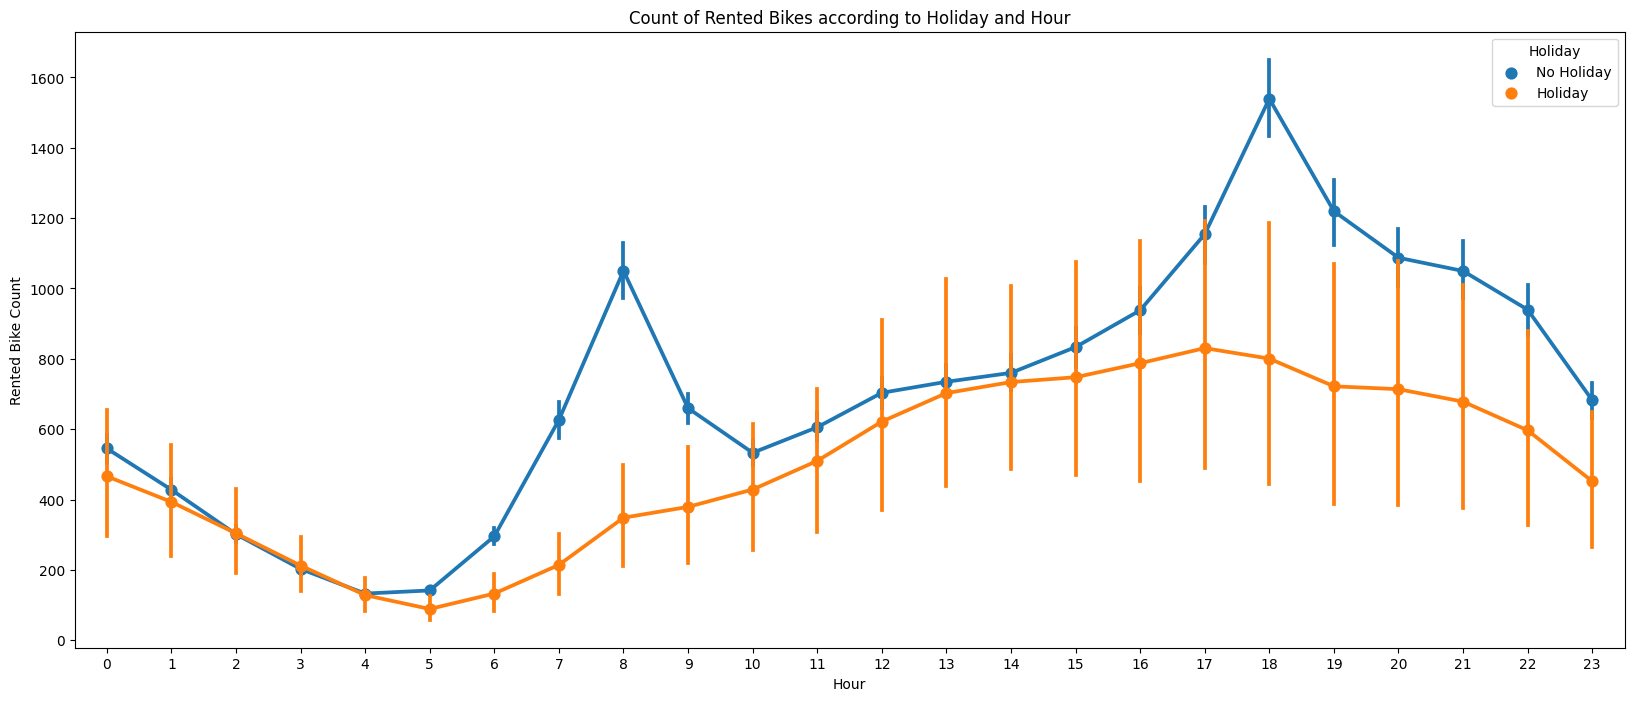

In [28]:
## Count of Rented Bikes according to Holiday and Hour

fig,ax = plt.subplots(figsize = (20,8))
sns.pointplot(data = df,x = 'Hour',y = 'Rented Bike Count',hue = 'Holiday')
plt.title('Count of Rented Bikes according to Holiday and Hour')

### 1. Why did you pick the specific chart?
A line plot is a useful tool for analyzing the trend and patterns in continuous data over time, which is why it may be a good choice for visualizing the bike sharing demand prediction data.

### 2. What is/are the insight(s) found from the chart?
plot shows that in holiday people uses the rented bike from 2pm-8pm

## Distribution Numeric Data

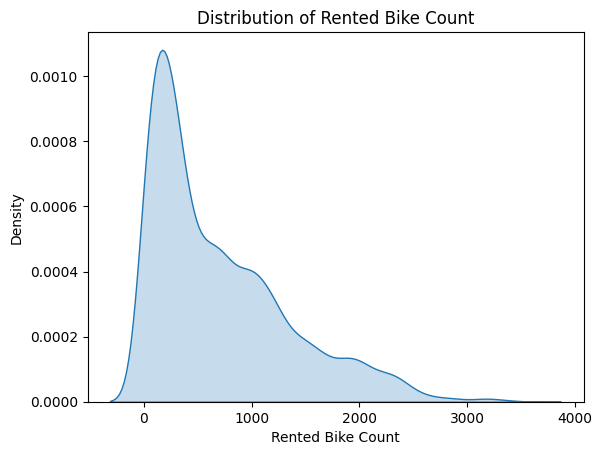

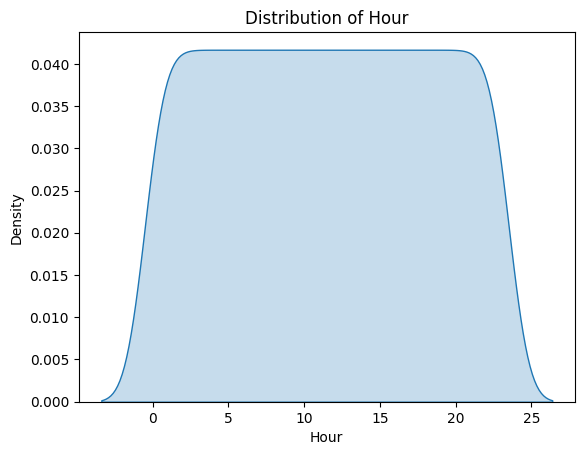

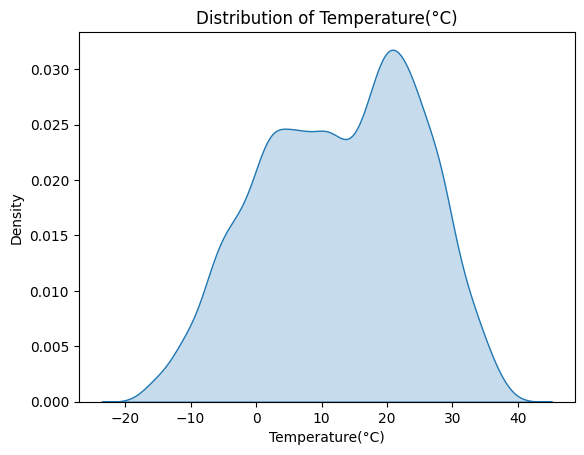

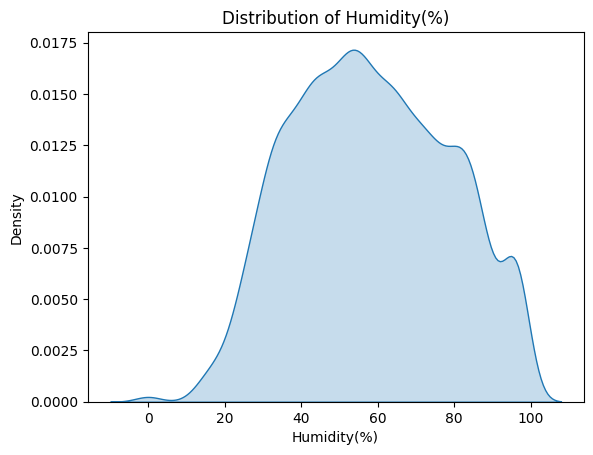

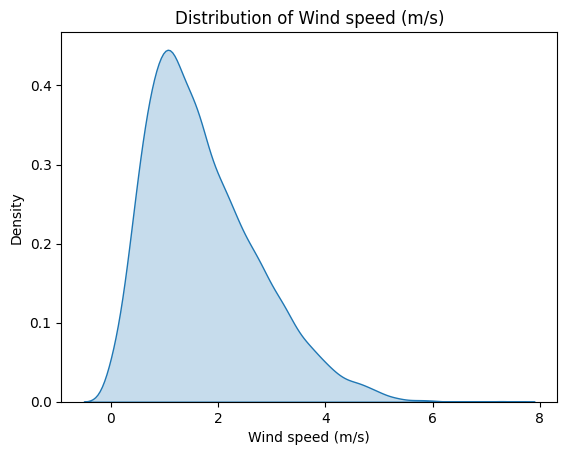

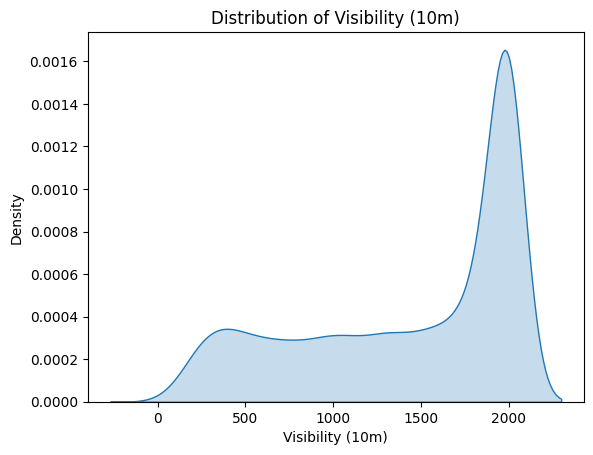

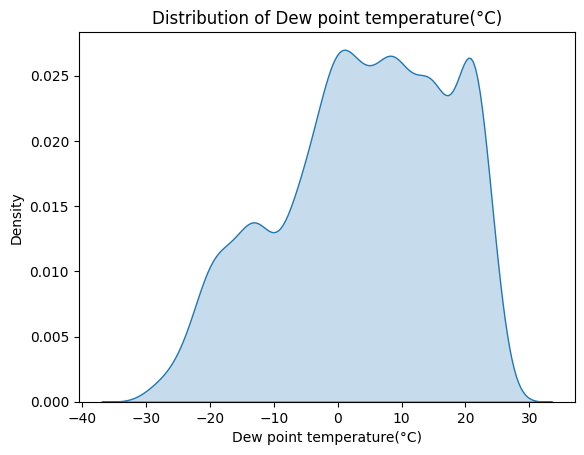

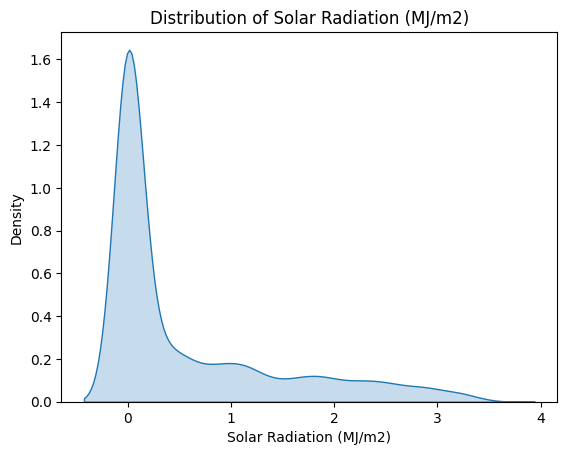

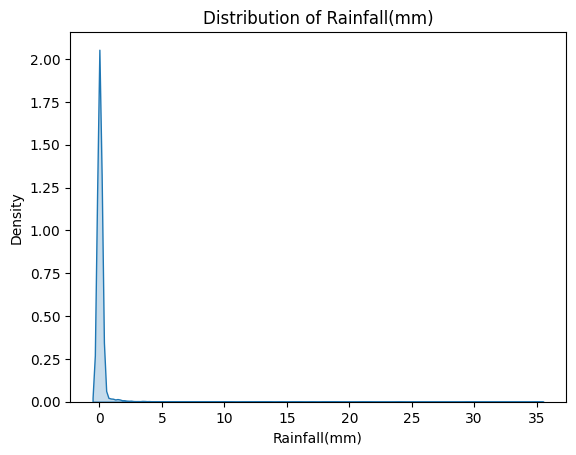

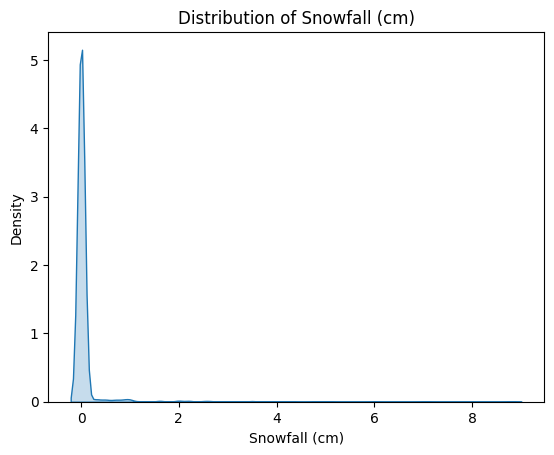

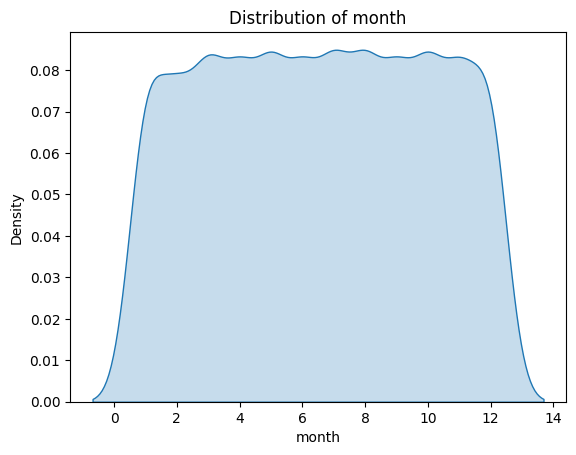

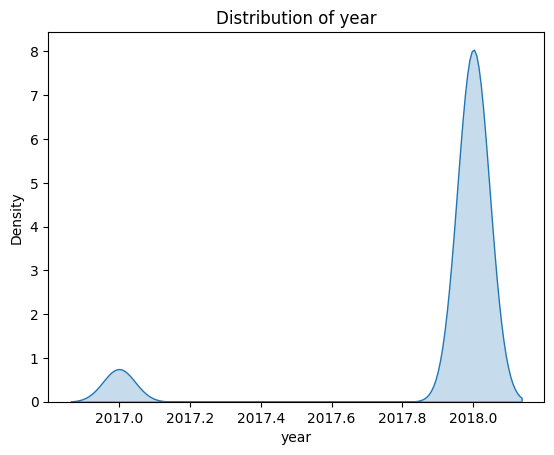

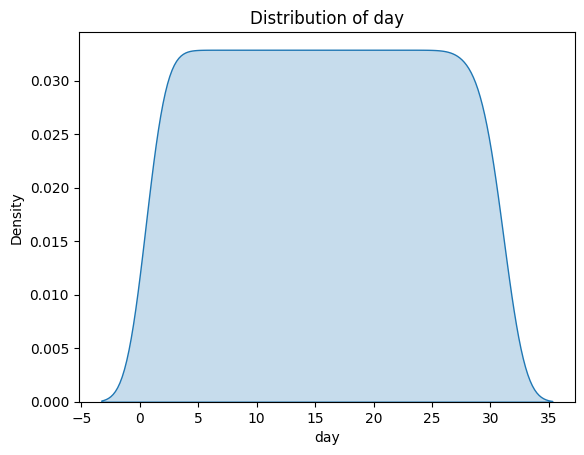

In [29]:
## Get the numerical columns

numerical_cols = df.select_dtypes(['int64','float64']).columns

## Plot the distribution curves

for col in numerical_cols:
    sns.kdeplot(df[col], shade=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Distribution of {}'.format(col))
    plt.show()

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>,
        <Axes: title={'center': 'Humidity(%)'}>],
       [<Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>,
        <Axes: title={'center': 'Dew point temperature(°C)'}>,
        <Axes: title={'center': 'Solar Radiation (MJ/m2)'}>],
       [<Axes: title={'center': 'Rainfall(mm)'}>,
        <Axes: title={'center': 'Snowfall (cm)'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'day'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

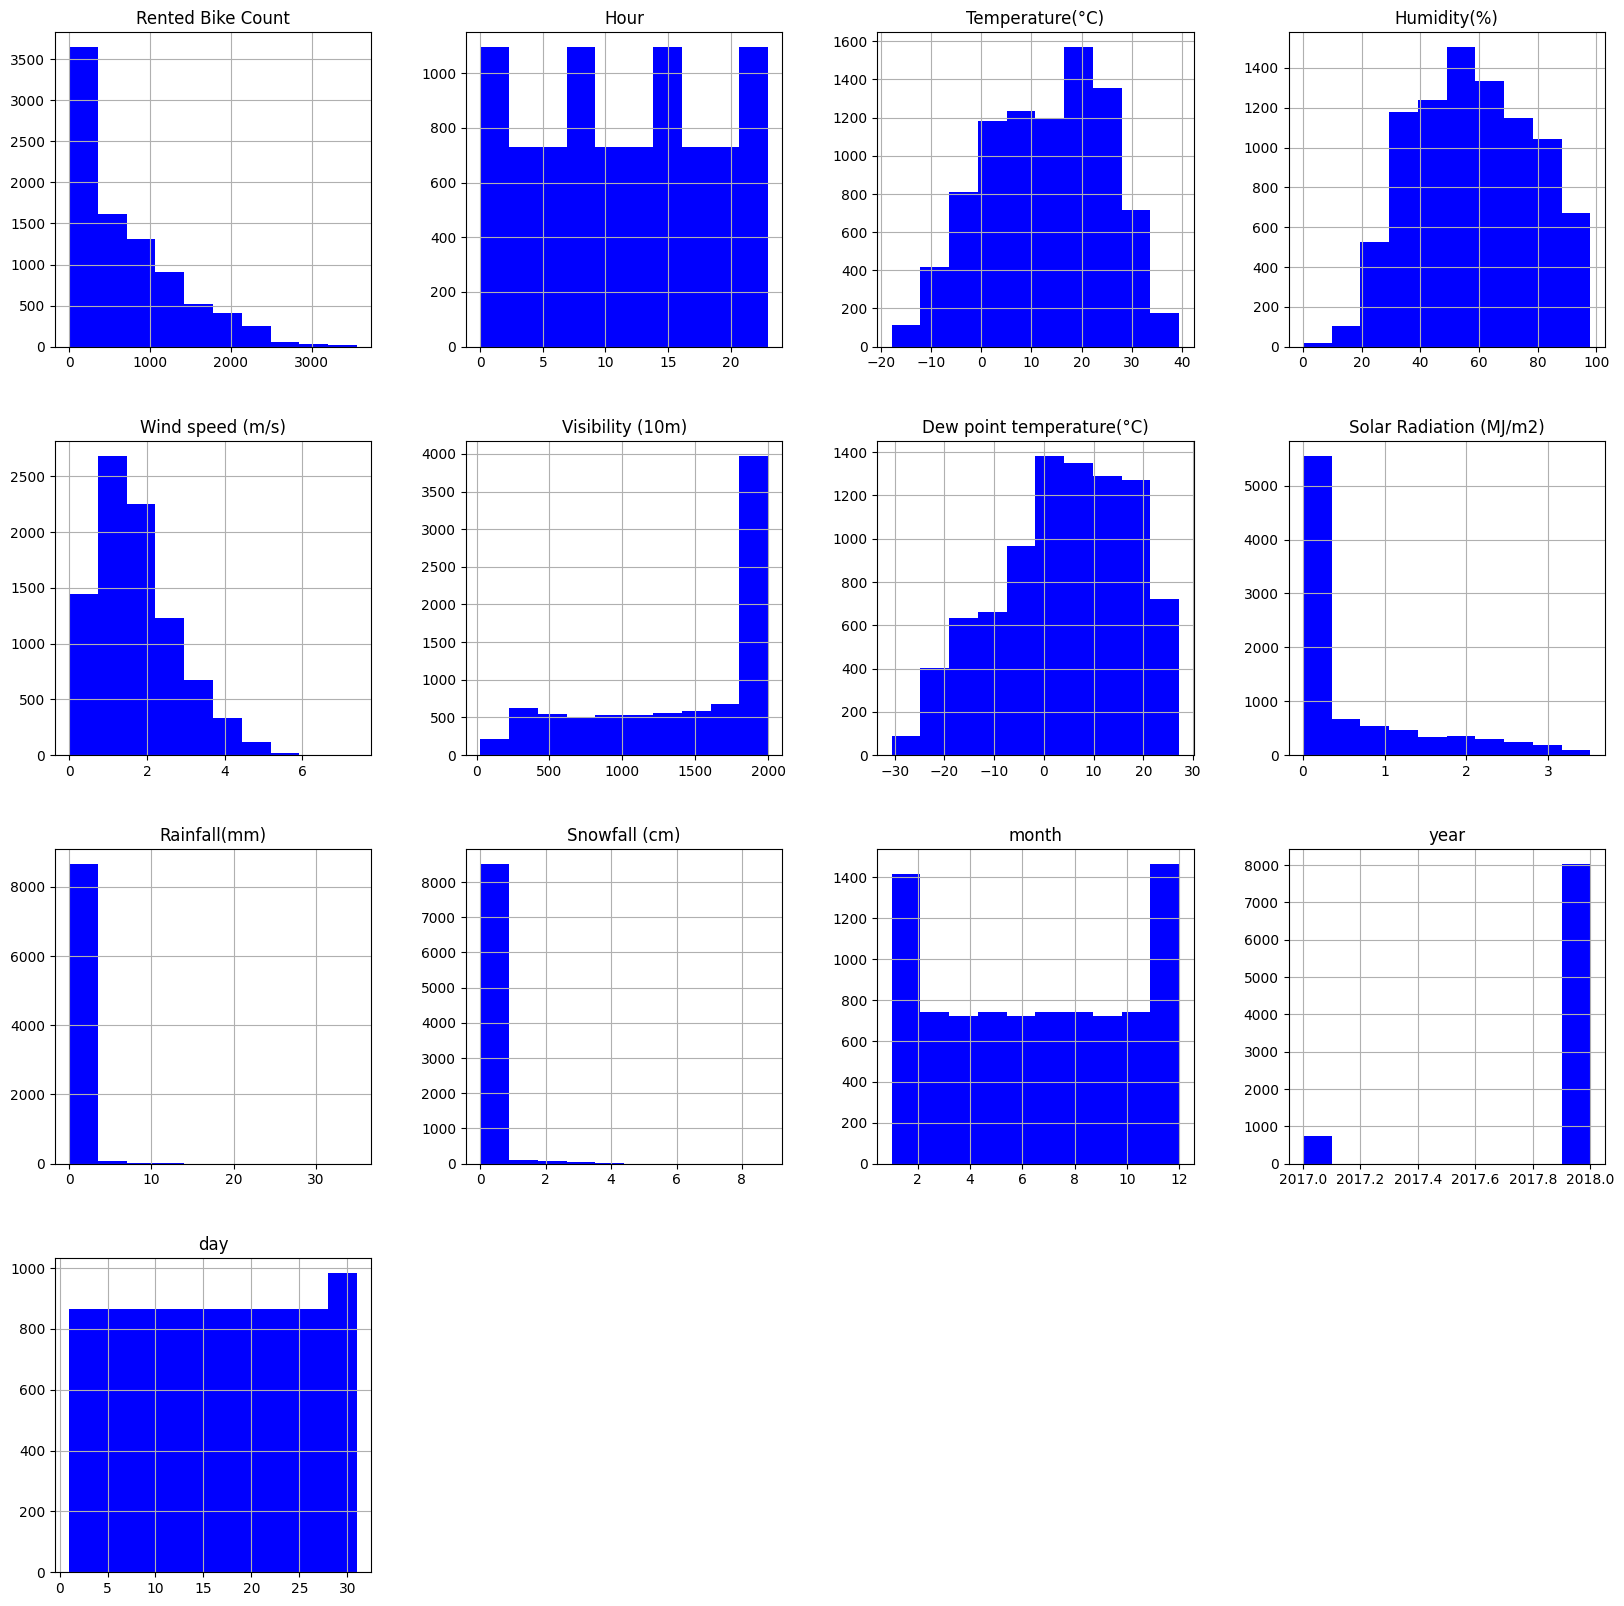

In [30]:
df.hist(figsize=(20,20), color='blue')

## Exploring Temperature feature - Bivariate analysis

Text(0.5, 1.0, 'Relationship between Rented Bike Count and Temperature')

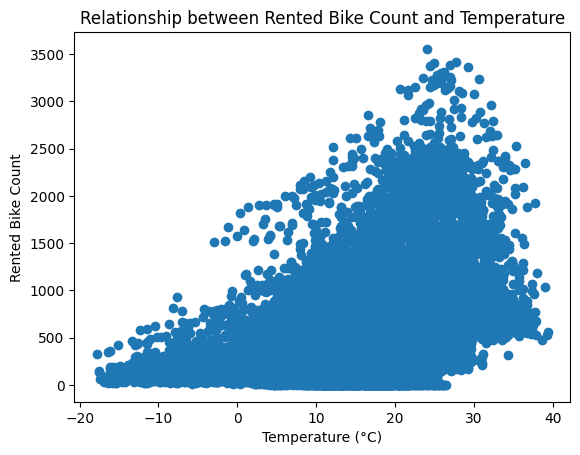

In [31]:
## Plot the relationship between Rented Bike Count and Temperature

plt.scatter(df['Temperature(°C)'], df['Rented Bike Count'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Temperature')

### 1. Why did you pick the specific chart?
Scatter charts are used to display the relationship between two variables, represented on the X and Y axis.

They are used to show the distribution of data points, identify potential outliers, and to detect any correlations or patterns in the data.

Scatter charts are particularly useful when you want to see the relationship between two continuous variables, rather than categorical data, and when you have many data points to display.

### 2. What is/are the insight(s) found from the chart?
people like to ride bikes when Temperature is 15 °C to 35°C

### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights from the data will help create a positive business impact for bike sharing companies. By understanding the demand patterns and the difference in demand between seasons, they can adjust their operations and resource allocation to meet the needs of their customers.

the company can increase the number of bikes available during the summer season to meet the high demand and reduce the number of bikes during the winter season to save on costs.

## Exploring Dew point temperature(°C) feature - Bivariate analysis

Text(0.5, 1.0, 'Relationship between Rented Bike Count and Dew point temperature(°C)')

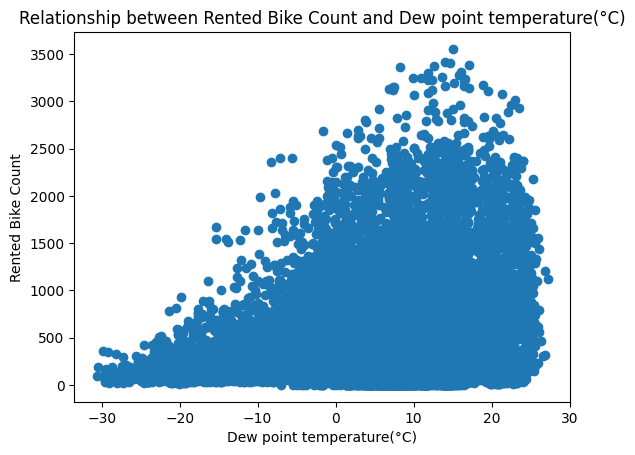

In [32]:
## Plot the relationship between Rented Bike Count and Dew point temperature(°C)

plt.scatter(df['Dew point temperature(°C)'], df['Rented Bike Count'])
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Dew point temperature(°C)')

### 1. Why did you pick the specific chart?
Scatter charts are used to display the relationship between two variables, represented on the X and Y axis.

They are used to show the distribution of data points, identify potential outliers, and to detect any correlations or patterns in the data.

Scatter charts are particularly useful when you want to see the relationship between two continuous variables, rather than categorical data, and when you have many data points to display.

### 2. What is/are the insight(s) found from the chart?
"Dew point temperature' is almost same as the 'temperature'

## Exploring Solar Radiation (MJ/m2) feature - Bivariate analysis

Text(0.5, 1.0, 'Relationship between Rented Bike Count and Solar Radiation (MJ/m2)')

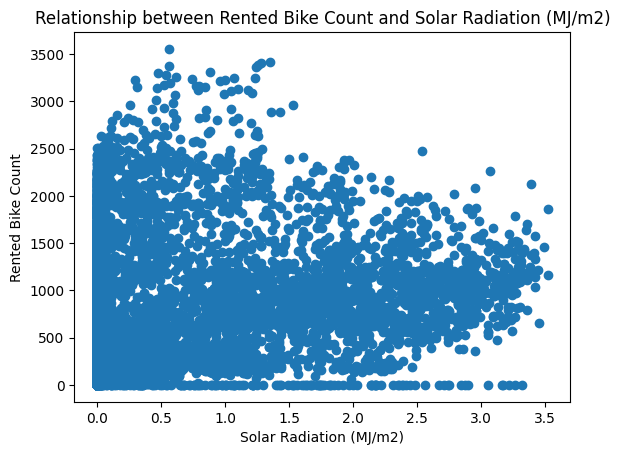

In [33]:
## Plot the relationship between Rented Bike Count and Solar Radiation (MJ/m2)

plt.scatter(df['Solar Radiation (MJ/m2)'], df['Rented Bike Count'])
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Solar Radiation (MJ/m2)')

### 1. Why did you pick the specific chart?
Scatter charts are used to display the relationship between two variables, represented on the X and Y axis.

They are used to show the distribution of data points, identify potential outliers, and to detect any correlations or patterns in the data.

Scatter charts are particularly useful when you want to see the relationship between two continuous variables, rather than categorical data, and when you have many data points to display.

### 2. What is/are the insight(s) found from the chart?
The amount of rented bikes is huge, when there is solar radiation

## Exploring Snowfall (cm)' feature - Bivariate analysis

Text(0.5, 1.0, 'Relationship between Rented Bike Count and Snowfall (cm)')

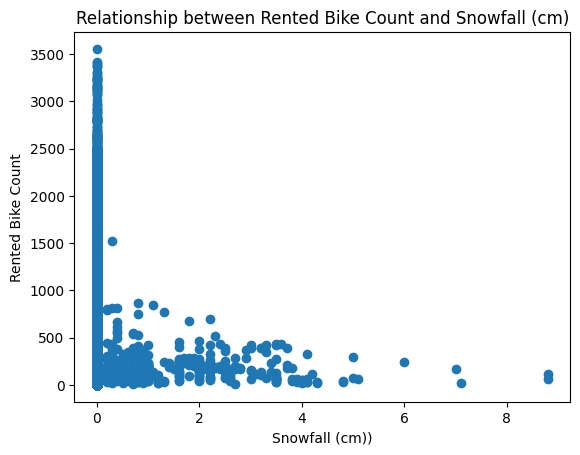

In [34]:
## Plot the relationship between Rented Bike Count and Snowfall (cm)

plt.scatter(df['Snowfall (cm)'], df['Rented Bike Count'])
plt.xlabel('Snowfall (cm))')
plt.ylabel('Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Snowfall (cm)')

### 1. Why did you pick the specific chart?
Scatter charts are used to display the relationship between two variables, represented on the X and Y axis.

They are used to show the distribution of data points, identify potential outliers, and to detect any correlations or patterns in the data.

Scatter charts are particularly useful when you want to see the relationship between two continuous variables, rather than categorical data, and when you have many data points to display.

### 2. What is/are the insight(s) found from the chart?
the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower

### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights can help create a positive business impact.

By understanding the correlation between snow accumulation and bike rental demand, the company can make informed decisions on their business operations.

They can adjust their fleet management, pricing, and marketing strategies to ensure they are providing the best possible services to their customers while also maximizing their profits.

They can also predict the low demand periods and take appropriate measures to reduce losses, such as reducing their operational costs or adjusting their inventory.

## Exploring Rainfall(mm) feature - Bivariate analysis

Text(0.5, 1.0, 'Relationship between Rented Bike Count and Rainfall(mm)')

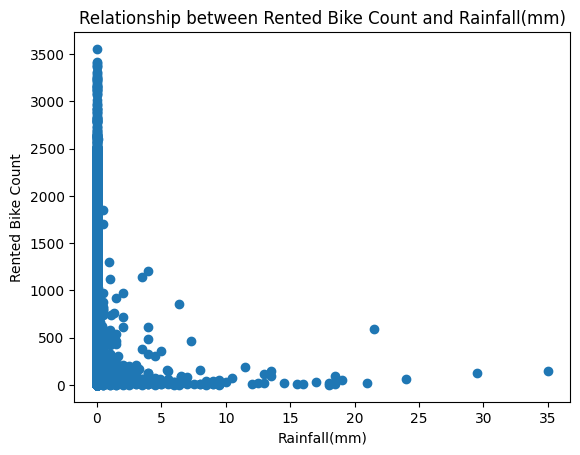

In [35]:
## Plot the relationship between Rented Bike Count and Rainfall(mm)

plt.scatter(df['Rainfall(mm)'], df['Rented Bike Count'])
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Rainfall(mm)')

### 1. Why did you pick the specific chart?
Scatter charts are used to display the relationship between two variables, represented on the X and Y axis.

They are used to show the distribution of data points, identify potential outliers, and to detect any correlations or patterns in the data.

Scatter charts are particularly useful when you want to see the relationship between two continuous variables, rather than categorical data, and when you have many data points to display.

### 2. What is/are the insight(s) found from the chart?
If rains a lot the demand of rent bikes is not decreasing, ex. even if we have 23 mm of rain there is a big peak of rented bikes

In [37]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'year', 'Weekday', 'day'],
      dtype='object')

## Exploring Wind speed (m/s) feature - Bivariate analysis

Text(0.5, 1.0, 'Relationship between Rented Bike Count and Wind speed (m/s)')

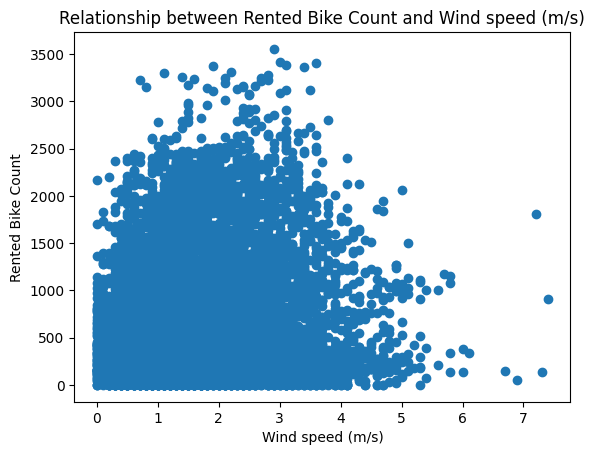

In [38]:
## Plot the relationship between Rented Bike Count and Rainfall(mm)

plt.scatter(df['Wind speed (m/s)'], df['Rented Bike Count'])
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship between Rented Bike Count and Wind speed (m/s)')